In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
customer = pd.read_csv('C:/Users/Smit/Downloads/archive/Mall_Customers.csv')

In [3]:
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer.isnull().mean()

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [5]:
customer.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
customer = pd.get_dummies(customer, columns=['Gender'])

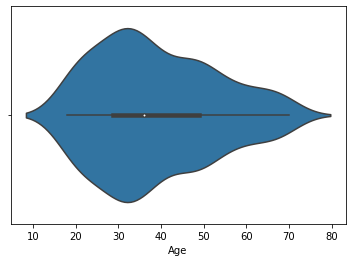

In [7]:
import seaborn as sns
sns.violinplot(customer['Age'])

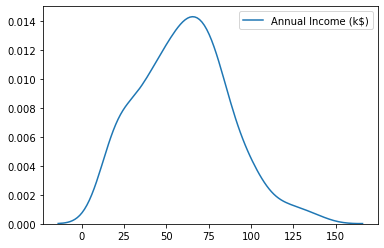

In [8]:
sns.kdeplot(customer['Annual Income (k$)'])

In [9]:
customer['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

In [50]:
pip install -U seaborn

  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1
Note: you may need to restart the kernel to use updated packages.


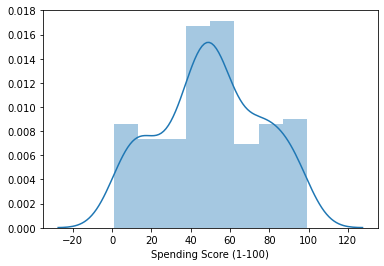

In [54]:
sns.distplot(customer['Spending Score (1-100)'], kde=True)

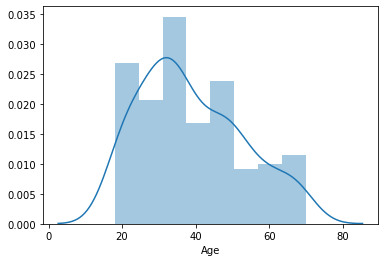

In [58]:
sns.distplot(customer['Age'], kde=True,hist=True)

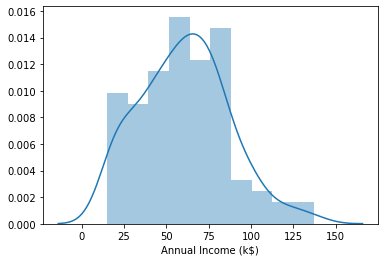

In [59]:
sns.distplot(customer['Annual Income (k$)'], kde=True,hist=True)

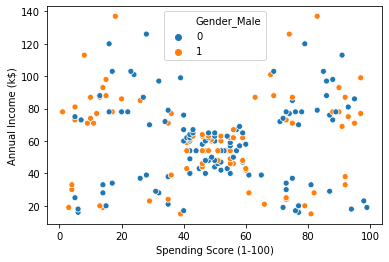

In [12]:
sns.scatterplot(customer['Spending Score (1-100)'], customer['Annual Income (k$)'], hue= customer['Gender_Male'])

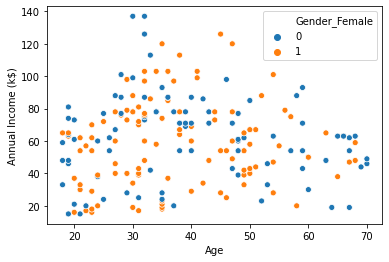

In [13]:
sns.scatterplot(customer['Age'], customer['Annual Income (k$)'], hue=customer['Gender_Female'])

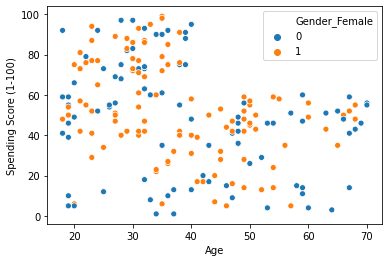

In [14]:
sns.scatterplot(customer['Age'], customer['Spending Score (1-100)'], hue= customer['Gender_Female'])

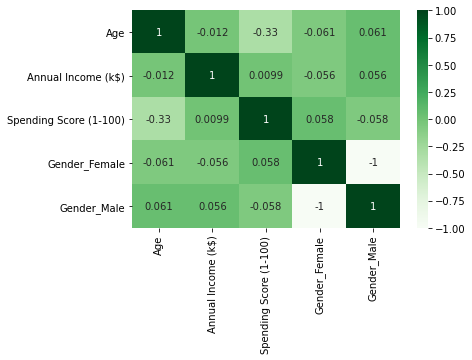

In [15]:
corr = customer.iloc[:,1:].corr()
sns.heatmap(corr, annot=True, cmap="Greens")

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cust = customer.copy()
cust.iloc[:,1:] = sc.fit_transform(cust.iloc[:,1:])

In [17]:
cust.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,2,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,3,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,4,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,5,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


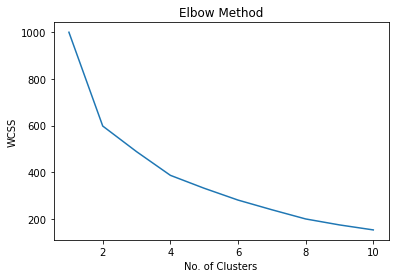

In [18]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(cust.iloc[:,1:])
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()                                        

In [19]:
from sklearn.metrics import silhouette_score
for k in range(2,12):
    kmeans = KMeans(n_clusters=k, init= 'k-means++')
    pred = kmeans.fit_predict(cust.iloc[:,1:])
    score = silhouette_score(cust.iloc[:,1:], pred)
    print(k, score)

2 0.39644160577705434
3 0.36782472313835896
4 0.33269643434208473
5 0.34600950627854876
6 0.36307611961184777
7 0.3759300351957508
8 0.4015225534537626
9 0.419162524729613
10 0.43792134047133907
11 0.43219714349046306


In [20]:
cust.shape

(200, 6)

In [21]:
km = KMeans(n_clusters=10, init= 'k-means++', random_state=0).fit_predict(cust.iloc[:,1:])

In [22]:
from sklearn.decomposition import PCA
for i in range(2,5):
    pca = PCA(n_components=i)
    pca_pred = pca.fit_transform(cust.iloc[:,1:])
    print(i)
    print('Variance of each component:', pca.explained_variance_ratio_)
    print('Total variance explained:', round(sum(list(pca.explained_variance_ratio_))*100,2))

2
Variance of each component: [0.405211   0.26189229]
Total variance explained: 66.71
3
Variance of each component: [0.405211   0.26189229 0.19834559]
Total variance explained: 86.54
4
Variance of each component: [0.405211   0.26189229 0.19834559 0.13455113]
Total variance explained: 100.0


In [23]:
pc = PCA(n_components=3).fit_transform(cust.iloc[:,1:])

In [24]:
pc = pd.DataFrame(pc)
pc.insert(loc=0, column='customer_id', value= cust['CustomerID'])

In [25]:
pc.head()

,customer_id,0,1,2
0,1,1.321908,-0.782594,-1.913170
1,2,1.150019,-1.816813,-2.002805
2,3,-1.320033,0.607360,-1.545541
3,4,-1.613849,-1.159959,-1.698450
4,5,-1.376544,0.234457,-1.546142


In [26]:
from sklearn.metrics import silhouette_score
for k in range(2,12):
    kmeans = KMeans(n_clusters=k, init= 'k-means++')
    pred = kmeans.fit_predict(pc.iloc[:,1:])
    score = silhouette_score(pc.iloc[:,1:], pred)
    print(k, score)

2 0.4606641275352245
3 0.444303697912546
4 0.4227169364196455
5 0.4239223263467507
6 0.41468999596354095
7 0.4390327013361538
8 0.4204963534021124
9 0.40024144747619383
10 0.4019111574210889
11 0.3877210888844191


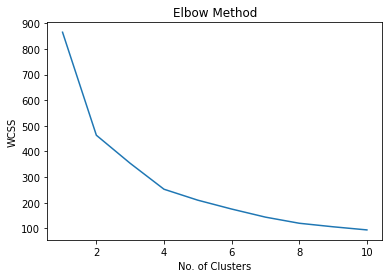

In [27]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(pc.iloc[:,1:])
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()                                        

In [28]:
pc_km5 = KMeans(n_clusters=5, init='k-means++', random_state=0).fit_predict(pc.iloc[:,1:])
pc_km2 = KMeans(n_clusters=2, init='k-means++', random_state=0).fit_predict(pc.iloc[:,1:])
pc_km3 = KMeans(n_clusters=3, init='k-means++', random_state=0).fit_predict(pc.iloc[:,1:])
pc_km7 = KMeans(n_clusters=7, init='k-means++', random_state=0).fit_predict(pc.iloc[:,1:])
pc_km8 = KMeans(n_clusters=8, init='k-means++', random_state=0).fit_predict(pc.iloc[:,1:])

pc['labels2']= pc_km2
pc['labels3']= pc_km3
pc['labels5']= pc_km5
pc['labels7']= pc_km7
pc['labels8']= pc_km8

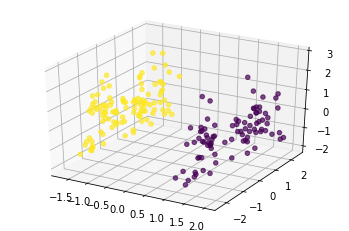

In [29]:
from mpl_toolkits import mplot3d
ax= plt.axes(projection = '3d')
ax.scatter3D(pc[0],pc[1],pc[2], alpha=0.7, c = pc['labels2'])

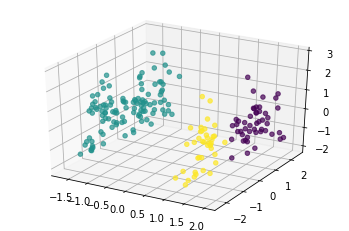

In [30]:
ax= plt.axes(projection = '3d')
ax.scatter3D(pc[0],pc[1],pc[2], alpha=0.7, c = pc['labels3'])

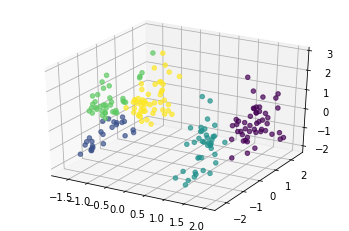

In [31]:
ax= plt.axes(projection = '3d')
ax.scatter3D(pc[0],pc[1],pc[2], alpha=0.7, c = pc['labels5'])

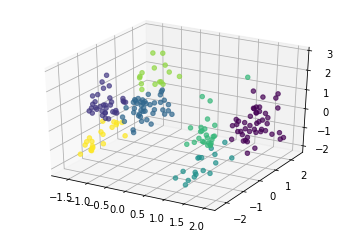

In [32]:
ax= plt.axes(projection = '3d')
ax.scatter3D(pc[0],pc[1],pc[2], alpha=0.7, c = pc['labels7'])

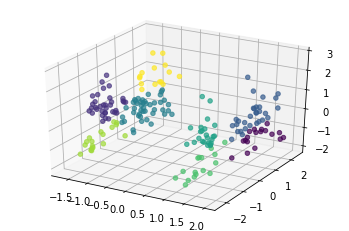

In [33]:
ax= plt.axes(projection = '3d')
ax.scatter3D(pc[0],pc[1],pc[2], alpha=0.7, c = pc['labels8'])

In [34]:
customer.loc[customer['Age']<18, 'age_bucket']= 'Kid'
customer.loc[customer['Age']>=60, 'age_bucket']= 'Senior Citizen'
customer.loc[(customer['Age']>=18)&(customer['Age']<60), 'age_bucket']= 'Adult'

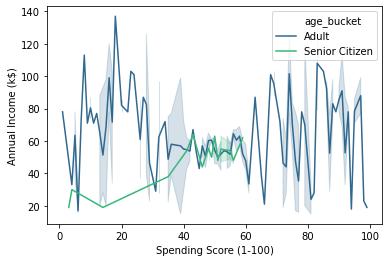

In [35]:
sns.lineplot(customer['Spending Score (1-100)'], customer['Annual Income (k$)'], hue=customer['age_bucket'], palette='viridis')

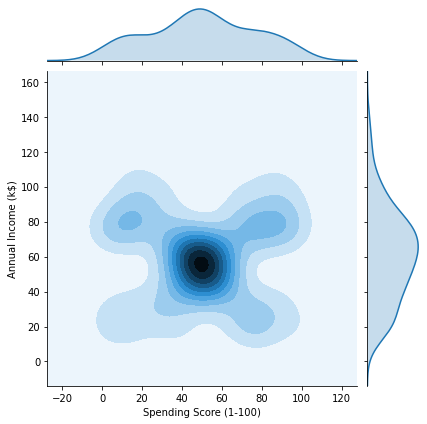

In [36]:
sns.jointplot(customer['Spending Score (1-100)'], customer['Annual Income (k$)'], kind='kde')

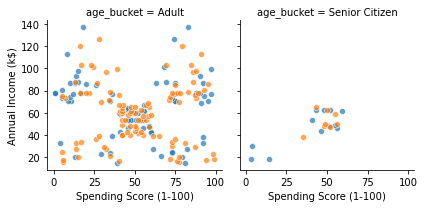

In [37]:
g = sns.FacetGrid(customer, col= 'age_bucket', hue= 'Gender_Female')
g.map(sns.scatterplot, 'Spending Score (1-100)', 'Annual Income (k$)', alpha=0.7)

In [38]:
customer.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,age_bucket
0,1,19,15,39,0,1,Adult
1,2,21,15,81,0,1,Adult
2,3,20,16,6,1,0,Adult
3,4,23,16,77,1,0,Adult
4,5,31,17,40,1,0,Adult


In [39]:
df = customer[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [40]:
from sklearn.metrics import silhouette_score
for k in range(2,12):
    kmeans = KMeans(n_clusters=k, init= 'k-means++')
    pred = kmeans.fit_predict(df)
    score = silhouette_score(df, pred)
    print(k, score)

2 0.293166070535953
3 0.3839349967742105
4 0.40570340605429833
5 0.44428597560893024
6 0.4523443947724053
7 0.4398198217929885
8 0.4280971079746162
9 0.41197801912451715
10 0.38416663259473777
11 0.37956074023980735


In [43]:
km = KMeans(n_clusters=6, init='k-means++', random_state=0).fit_predict(df)

<IPython.core.display.Javascript object>


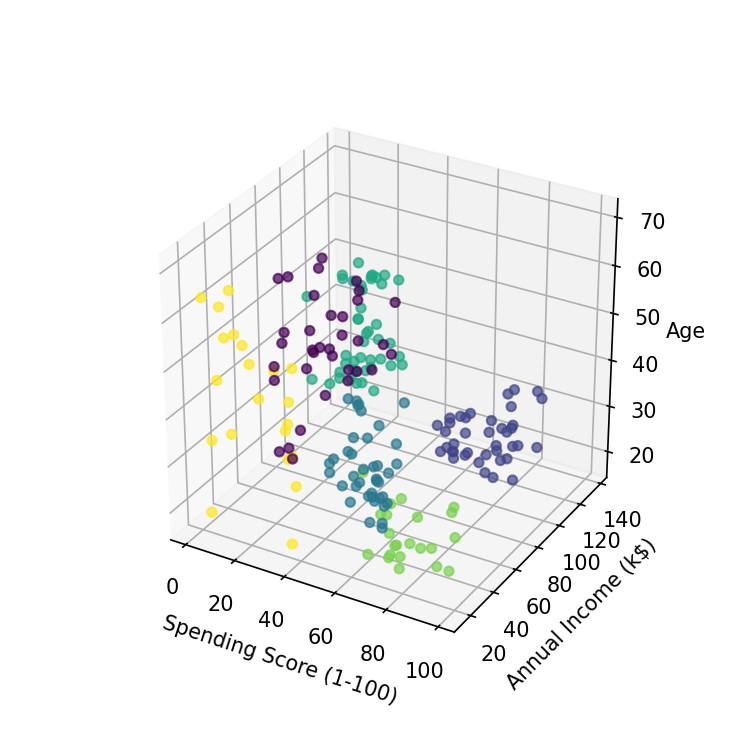

Text(0.5, 0, 'Age')

In [73]:
plt.figure(figsize=(5,5))
ax= plt.axes(projection = '3d')
ax.scatter3D(df['Spending Score (1-100)'],df['Annual Income (k$)'],df['Age'], alpha=0.7, c = km)
ax.set_xlabel('Spending Score (1-100)')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Age')